# Preprocessing Task

## Import Needed Libraries

In [317]:
# Import Needed Libraries
import pandas as pd
import numpy as np

In [318]:
# Read data and show first 5 rows
df = pd.read_csv('house_prices.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [319]:
# Data Shape ?
df.shape

(1460, 81)

In [320]:
# Data Info (Data Type of Each column) ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [321]:
# what the number of Numurical and Categorical Columns ?

num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

print("#Num_cols", len(num_cols))
print("#Cat_cols", len(cat_cols))


#Num_cols 38
#Cat_cols 43


In [322]:
def clean_dataset(dataset):
    null_percentage = dataset.isnull().mean() * 100

    # 80% or higher null values -> drop Feature
    columns_to_drop = null_percentage[null_percentage >= 80].index
    dataset = dataset.drop(columns=columns_to_drop)

    # > 3% and < 80% -> fill it by mean
    columns_to_fill = null_percentage[(null_percentage > 3) & (null_percentage < 80)].index
    numeric_cols = dataset[columns_to_fill].select_dtypes(include=['number']).columns
    dataset[numeric_cols] = dataset[numeric_cols].apply(lambda col: col.fillna(col.mean()))


    # < 3% -> remove row containing null value
    columns_to_remove = null_percentage[null_percentage < 3].index
    dataset = dataset.dropna()
    # dataset = dataset.drop(columns=columns_to_remove)

    print("#>>>f_to_be_removed: ", columns_to_drop)
    print("#>>>f_to_be_filled: ", columns_to_fill)
    print("#>>>f_to_be_removed: ", columns_to_remove)
    return dataset

# df = pd.read_csv("house_prices.csv")
df_cleaned = clean_dataset(df)
print(df_cleaned.isnull().sum())

#>>>f_to_be_removed:  Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
#>>>f_to_be_filled:  Index(['LotFrontage', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
#>>>f_to_be_removed:  Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath'

# Redundant Handling

### Automated function for both categorical and numircal data

In [323]:
# write function to calculate the most redundant value in each column how many it repeated ?
def most_redundant_values(dataset):
    redundant_info = {}
    for column in df.columns:
        most_common_value = df[column].mode()[0]  # Get the most frequent value
        count = (df[column] == most_common_value).sum()  # Count occurrences
        redundant_info[column] = count
    return redundant_info

# Example usage:
result = most_redundant_values(df)
result

{'Id': 1,
 'MSSubClass': 536,
 'MSZoning': 1151,
 'LotFrontage': 143,
 'LotArea': 25,
 'Street': 1454,
 'Alley': 50,
 'LotShape': 925,
 'LandContour': 1311,
 'Utilities': 1459,
 'LotConfig': 1052,
 'LandSlope': 1382,
 'Neighborhood': 225,
 'Condition1': 1260,
 'Condition2': 1445,
 'BldgType': 1220,
 'HouseStyle': 726,
 'OverallQual': 397,
 'OverallCond': 821,
 'YearBuilt': 67,
 'YearRemodAdd': 178,
 'RoofStyle': 1141,
 'RoofMatl': 1434,
 'Exterior1st': 515,
 'Exterior2nd': 504,
 'MasVnrType': 445,
 'MasVnrArea': 861,
 'ExterQual': 906,
 'ExterCond': 1282,
 'Foundation': 647,
 'BsmtQual': 649,
 'BsmtCond': 1311,
 'BsmtExposure': 953,
 'BsmtFinType1': 430,
 'BsmtFinSF1': 467,
 'BsmtFinType2': 1256,
 'BsmtFinSF2': 1293,
 'BsmtUnfSF': 118,
 'TotalBsmtSF': 37,
 'Heating': 1428,
 'HeatingQC': 741,
 'CentralAir': 1365,
 'Electrical': 1334,
 '1stFlrSF': 25,
 '2ndFlrSF': 829,
 'LowQualFinSF': 1434,
 'GrLivArea': 22,
 'BsmtFullBath': 856,
 'BsmtHalfBath': 1378,
 'FullBath': 768,
 'HalfBath': 913

In [324]:
# if it repeated more than or equal 80% from data rows count remove the feature 
# Data row count = data.shape[0]
def remove_highly_redundant_features(dataset, threshold=0.8):
    total_rows = df.shape[0]
    drop_columns = []
    redundant_counts = {}

    for column in dataset.columns:
        most_common_value = dataset[column].mode()[0]
        count = (df[column] == most_common_value).sum()
        redundant_counts[column] = count

        if count / total_rows >= threshold:
            drop_columns.append(column)

    df_cleaned = dataset.drop(columns=drop_columns, errors='ignore')

    return df_cleaned, drop_columns, redundant_counts

df_cleaned, dropped_features, redundant_counts = remove_highly_redundant_features(df)

print("Dropped Features:", dropped_features)
print("Most Redundant Value Counts:", redundant_counts)


Dropped Features: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']
Most Redundant Value Counts: {'Id': 1, 'MSSubClass': 536, 'MSZoning': 1151, 'LotFrontage': 143, 'LotArea': 25, 'Street': 1454, 'Alley': 50, 'LotShape': 925, 'LandContour': 1311, 'Utilities': 1459, 'LotConfig': 1052, 'LandSlope': 1382, 'Neighborhood': 225, 'Condition1': 1260, 'Condition2': 1445, 'BldgType': 1220, 'HouseStyle': 726, 'OverallQual': 397, 'OverallCond': 821, 'YearBuilt': 67, 'YearRemodAdd': 178, 'RoofStyle': 1141, 'RoofMatl': 1434, 'Exterior1st': 515, 'Exterior2nd': 504, 'MasVnrType': 445, 'MasVnrArea': 861, 'ExterQual': 906, 'ExterCond': 1282, 'Foundation': 647, '

# Handling correlation between features

In [325]:
#calculate the correlation matrix  (note the correlation matrix just only for numirical features )
df_cleaned.select_dtypes(include=['number']).corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

In [326]:
def drop_highly_correlated_features(dataset, threshold=0.7):
    numeric_data = dataset.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()
    drop_features = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                col1 = correlation_matrix.columns[i]
                col2 = correlation_matrix.columns[j]

                total_corr1 = correlation_matrix[col1].abs().sum()
                total_corr2 = correlation_matrix[col2].abs().sum()

                if total_corr1 < total_corr2:
                    drop_features.add(col1)
                else:
                    drop_features.add(col2)

    dataset = dataset.drop(columns=drop_features, errors='ignore')

    return dataset, drop_features

df_cleaned2, dropped_features = drop_highly_correlated_features(df_cleaned)
print("Dropped Features:", dropped_features)

Dropped Features: {'TotalBsmtSF', 'GarageYrBlt', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea', 'OverallQual'}


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [327]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.select_dtypes(include=['number']).copy()

    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df_cleaned, num_cols)
df_cleaned

KeyError: 'BsmtFinSF2'

# Skewness Handling
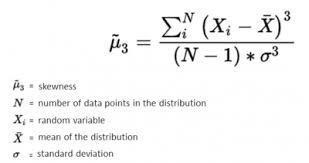


In [328]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
def skewness_calc(dataset):
    N = dataset.select_dtypes(include=['number']).shape[0]
    mean = np.mean(dataset.select_dtypes(include=['number']))
    std = np.std(dataset.select_dtypes(include=['number']), ddof=1)

    skewness = ((dataset.select_dtypes(include=['number']) - mean) ** 3 ).sum() / ((N-1) * (std ** 3))
    return skewness

X = skewness_calc(df_cleaned)
print(X)

Id             -3.596111e+03
MSSubClass     -4.740323e+06
LotFrontage    -2.049229e+07
LotArea         1.323768e+01
OverallQual    -1.385545e+11
OverallCond    -2.660289e+11
YearBuilt      -5.076877e+06
YearRemodAdd   -1.576996e+07
MasVnrArea     -5.903771e+04
BsmtFinSF1     -3.239132e+03
BsmtUnfSF      -3.368879e+03
TotalBsmtSF    -2.734863e+03
1stFlrSF       -3.783046e+03
2ndFlrSF       -3.851782e+03
GrLivArea      -1.271696e+03
BsmtFullBath   -2.629294e+12
FullBath       -2.196108e+12
HalfBath       -2.888800e+12
BedroomAbvGr   -6.760152e+11
TotRmsAbvGrd   -8.533602e+10
Fireplaces     -1.371126e+12
GarageYrBlt    -8.741226e+06
GarageCars     -8.797544e+11
GarageArea     -3.072115e+04
WoodDeckSF     -1.795073e+05
OpenPorchSF    -1.239118e+06
MoSold         -1.854401e+10
YrSold         -5.845250e+10
SalePrice       1.891310e+01
dtype: float64


# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [329]:
# Features that have absolute skewness > 1 do for it Log transformation
def log_transform(dataset):
    skewness = skewness_calc(dataset)
    skewed_features = skewness[abs(skewness) > 1].index

    dataset[skewed_features] = skewness[skewed_features]

    return skewed_features

print(log_transform(df_cleaned))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


# Transform categorical features 

In [330]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']


In [331]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Write code to transform each ordinal and nominal columns 
# سيرشك الجميل بقي وشوف كل واحد بيطلع ايه وازاي هتلم الداتا بتاعتك معلش هتعبك معانا يا جميل

### LabelEncoder

In [332]:
# df_output1 = pd.DataFrame(index=df_cleaned.index)

for col in ordinal_cats:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

df_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SalePrice
0,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,Inside,CollgCr,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
1,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,FR2,Veenker,1Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
2,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,0,Inside,CollgCr,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
3,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,0,Corner,Crawfor,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
4,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,0,FR2,NoRidge,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,Inside,Gilbert,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097
1456,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,Inside,NWAmes,1Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,MnPrv,NaN,-1.854401e+10,-5.845250e+10,18.913097
1457,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,Inside,Crawfor,2Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,GdPrv,Shed,-1.854401e+10,-5.845250e+10,18.913097
1458,-3596.110916,-4.740323e+06,RL,-2.049229e+07,13.237679,NaN,3,Inside,NAmes,1Story,...,-8.797544e+11,-30721.15175,-179507.291669,-1.239118e+06,NaN,NaN,NaN,-1.854401e+10,-5.845250e+10,18.913097


### OneHotEncoder

In [333]:
cat_encoder = OneHotEncoder()
df_encoded = pd.DataFrame(cat_encoder.fit_transform(df_cleaned[nominal_cats]).toarray(),
                          columns=cat_encoder.get_feature_names_out(),
                          index=df_cleaned.index)
df_cleaned = df_cleaned.drop(columns=nominal_cats).join(df_encoded)
df_cleaned

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan
0,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Transform Numerical features 
> I want you apply only Min-Max Scaling for all numerical columns

In [334]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_cleaned[num_cols] = min_max_scaler.fit_transform(df_cleaned[num_cols])
df_cleaned

# الكود كان شغال يا جدعان ايه اللي زعله

KeyError: "['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] not in index"

In [335]:
# print Your final data frame here 
df_cleaned.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan
0,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,3,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-3596.110916,-4.740323e+06,-2.049229e+07,13.237679,NaN,0,-1.385545e+11,-2.660289e+11,-5.076877e+06,-1.576996e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## End 
## لو وصلت لهنا بالسلامه تبقي تنين وتاخد 5 بونص و5 كمان لو كان حلك كله تمام